Cost after iteration 0: 2.30
Accuracy after iteration 0: 11.55%
Cost after iteration 1000: 0.30
Accuracy after iteration 1000: 91.48%
Cost after iteration 2000: 0.26
Accuracy after iteration 2000: 92.51%
Cost after iteration 3000: 0.23
Accuracy after iteration 3000: 93.43%
Cost after iteration 4000: 0.21
Accuracy after iteration 4000: 94.18%
Cost after iteration 5000: 0.20
Accuracy after iteration 5000: 94.41%
Cost after iteration 6000: 0.19
Accuracy after iteration 6000: 94.68%
Cost after iteration 7000: 0.18
Accuracy after iteration 7000: 94.83%
Cost after iteration 8000: 0.18
Accuracy after iteration 8000: 94.98%
Cost after iteration 9000: 0.17
Accuracy after iteration 9000: 95.10%


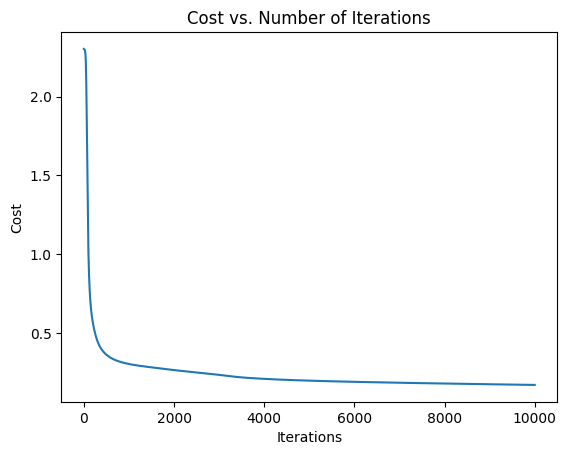

Train set accuracy: 95.20%
Test set accuracy: 94.05%


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('train.csv')
data = np.array(data)
np.random.shuffle(data)

m, n = data.shape
data = data.T

data_test = data[:, :2000].T
Y_test = data_test[:, 0].reshape(-1, 1)
X_test = data_test[:, 1:n]

data_train = data[:, 2000:m].T
Y_train = data_train[:, 0].reshape(-1, 1)
X_train = data_train[:, 1:n]

X_train = X_train / 255.0
X_test = X_test / 255.0

m_train, n_train = X_train.shape
m_test, n_test = X_test.shape

def init_params():
    W1 = np.random.randn(10, 784) * 0.01
    b1 = np.zeros((10, 1))
    W2 = np.random.randn(10, 10) * 0.01
    b2 = np.zeros((10, 1))
    
    parameters = {
        "W1": W1,
        "W2": W2,
        "b1": b1,
        "b2": b2
    }
    return parameters

def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    Z = Z - np.max(Z, axis=0, keepdims=True)
    return np.exp(Z) / np.sum(np.exp(Z), axis=0, keepdims=True)

def one_hot(Y):
    Y_int = Y.astype(int)
    one_hot_Y = np.zeros((Y_int.size, Y_int.max() + 1))
    one_hot_Y[np.arange(Y_int.size), Y_int.flatten()] = 1
    return one_hot_Y.T

def forward_propagation(parameters, X):
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1, X.T) + b1
    A1 = ReLU(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    
    cache = {
        "Z1": Z1,
        "A1": A1,
        "Z2": Z2,
        "A2": A2
    }
    return cache

def compute_cost(A2, Y, m):
    return (-1 / m) * np.sum(Y * np.log(A2))

def backward_propagation(m, cache, parameters, Y, X):
    Z1 = cache["Z1"]
    A1 = cache["A1"]
    Z2 = cache["Z2"]
    A2 = cache["A2"]
    
    W2 = parameters["W2"]
    
    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * (A1 > 0)
    dW1 = (1 / m) * np.dot(dZ1, X)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {
        "dW1": dW1,
        "dW2": dW2,
        "db1": db1,
        "db2": db2
    }
    return grads

def update_params(parameters, grads, alpha):
    parameters["W1"] -= alpha * grads["dW1"]
    parameters["W2"] -= alpha * grads["dW2"]
    parameters["b1"] -= alpha * grads["db1"]
    parameters["b2"] -= alpha * grads["db2"]
    return parameters

def predict(parameters, X):
    cache = forward_propagation(parameters, X)
    A2 = cache["A2"]
    return np.argmax(A2, axis=0)

def accuracy(predictions, Y):
    return np.mean(predictions == Y.flatten()) * 100

def nn_model(X, Y, parameters, n_h, alpha, num_iterations=10000, print_cost=False, print_accuracy=False):
    m = X.shape[0]  # Number of examples
    costs = []  # List to store cost at each iteration

    for i in range(num_iterations):
        cache = forward_propagation(parameters, X)
        A2 = cache["A2"]
        cost = compute_cost(A2, Y, m)
        costs.append(cost)  # Record the cost at this iteration
        grads = backward_propagation(m, cache, parameters, Y, X)
        parameters = update_params(parameters, grads, alpha)
        
        if print_cost and i % 1000 == 0:
            print(f"Cost after iteration {i}: {cost:.2f}")
        
        if print_accuracy and i % 1000 == 0:
            predictions = predict(parameters, X)
            acc = accuracy(predictions, np.argmax(Y, axis=0))
            print(f"Accuracy after iteration {i}: {acc:.2f}%")
            
    return parameters, costs

Y_train_one_hot = one_hot(Y_train)
Y_test_one_hot = one_hot(Y_test)

parameters = init_params()

parameters, costs = nn_model(X_train, Y_train_one_hot, parameters, n_h=10, alpha=0.15, num_iterations=10000, print_cost=True, print_accuracy=True)

plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Number of Iterations')
plt.show()

predictions_train = predict(parameters, X_train)
train_acc = accuracy(predictions_train, np.argmax(Y_train_one_hot, axis=0))
print(f"Train set accuracy: {train_acc:.2f}%")

predictions_test = predict(parameters, X_test)
test_acc = accuracy(predictions_test, np.argmax(Y_test_one_hot, axis=0))
print(f"Test set accuracy: {test_acc:.2f}%")
